# Twitter Sentiment Analysis Project
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade

## Project Overview
This project aims to develop a state-of-the-art sentiment analysis system using the Twitter Sentiments dataset. The goal is to classify tweets into sentiment categories (e.g., positive, negative, neutral) while providing actionable insights for real-world applications such as customer service monitoring, brand reputation management, and market trend analysis.

## Objectives
1. Build a high-performance sentiment classification model leveraging modern NLP techniques.
2. Extract meaningful insights from social media data to inform business decisions.
3. Ensure the system meets regulatory and industry compliance standards, including transparency and explainability.

## Project Workflow

### 1. Data Understanding and Exploration
- Inspect the dataset structure and content.
- Analyze class distribution and tweet characteristics.
- Detect and handle missing or duplicate data.

### 2. Data Preprocessing
- Clean text: remove URLs, mentions, hashtags, and unnecessary characters.
- Normalize text: lowercase, lemmatize, remove stopwords.
- Tokenize text and convert to embeddings.
- Handle class imbalance using techniques like oversampling or class weights.

### 3. Feature Representation
- Baseline: TF-IDF vectorization for traditional ML models.
- Advanced: Contextual embeddings using transformer models (BERT, RoBERTa).

### 4. Model Selection and Training
- Train baseline models (Logistic Regression, Naive Bayes) for benchmarking.
- Fine-tune transformer-based models for superior performance.
- Employ ensemble strategies to improve robustness.

### 5. Model Evaluation
- Use metrics: Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.
- Apply explainability tools (SHAP or LIME) for model transparency.

### 6. Deployment Considerations
- Batch processing for historical analysis.
- Real-time streaming for live tweet analysis using Kafka or Spark Streaming.
- API deployment for integration with other applications.

### 7. Monitoring and Maintenance
- Track model performance and detect drift over time.
- Update the model periodically with new data.
- Maintain reproducibility using version-controlled pipelines.

### 8. Actionable Insights
- Identify trends in public sentiment towards products, services, or events.
- Detect spikes in negative sentiment for proactive intervention.
- Generate topic-specific sentiment reports for strategic decision-making.

This project will establish a **robust, scalable, and compliant sentiment analysis system**, providing both predictive power and business intelligence insights from Twitter data.


In [19]:
# Environment Setup for Twitter Sentiment Analysis

# Install necessary packages (uncomment if not already installed)
# !pip install pandas numpy matplotlib seaborn scikit-learn nltk wordcloud transformers torch

# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing Libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Transformer-based models (Hugging Face)
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers.modeling_tf_utils import TFPreTrainedModel
from transformers import TFPreTrainedModel

import torch

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("Environment setup complete!")


ImportError: cannot import name 'TFPreTrainedModel' from 'transformers' (C:\Users\AKINMADE FARUQ\anaconda3\Lib\site-packages\transformers\__init__.py)

In [2]:
# Load and Inspect the Dataset

# Load dataset
df = pd.read_csv("Twitter Sentiments.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(df['label'].value_counts())

# Summary statistics
print("\nDataset Summary Statistics:")
display(df.describe())


First 5 rows of the dataset:


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB

Missing Values:
id       0
label    0
tweet    0
dtype: int64

Class Distribution:
label
0    29720
1     2242
Name: count, dtype: int64

Dataset Summary Statistics:


,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [3]:
# Data Preprocessing

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess tweets
def preprocess_tweet(tweet):
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove URLs
    tweet = re.sub(r'http\S+|www.\S+', '', tweet)
    # Remove hashtags (keep the text)
    tweet = re.sub(r'#', '', tweet)
    # Remove punctuation and numbers
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    # Lowercase the text
    tweet = tweet.lower()
    # Tokenize and remove stopwords
    words = tweet.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Rejoin words into cleaned tweet
    return ' '.join(words)

# Apply preprocessing to the tweet column
df['clean_tweet'] = df['tweet'].apply(preprocess_tweet)

# Display first 5 cleaned tweets
print("First 5 cleaned tweets:")
display(df[['tweet', 'clean_tweet']].head())


First 5 cleaned tweets:


,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love u take u time ur
4,factsguide: society now #motivation,factsguide society motivation


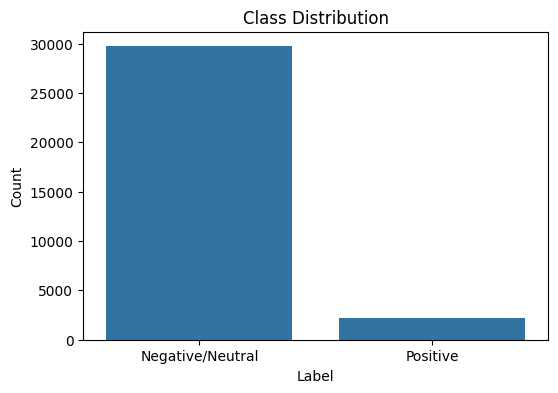

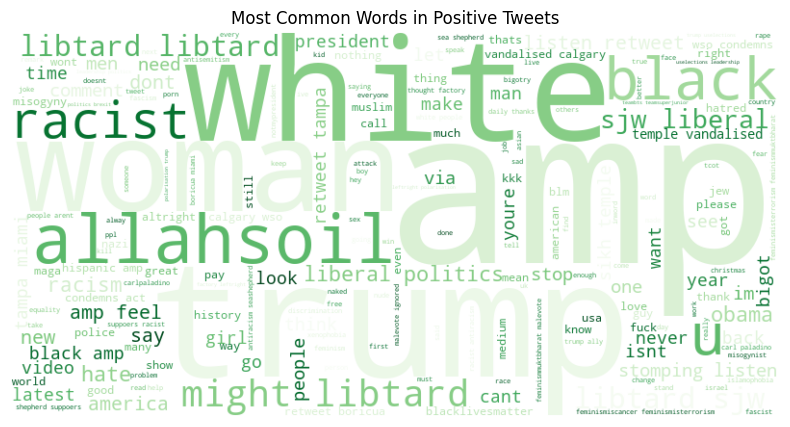

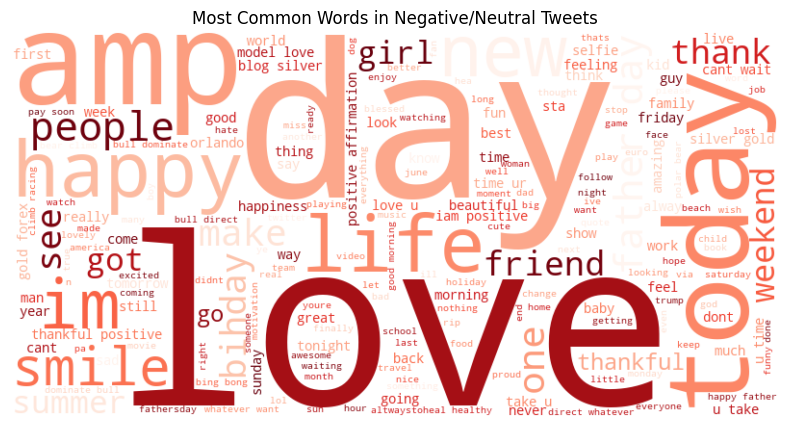

In [4]:
# Data Visualization
# 1. Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0,1], ['Negative/Neutral', 'Positive'])
plt.show()

# 2. Word Clouds for each class
positive_tweets = ' '.join(df[df['label']==1]['clean_tweet'])
negative_tweets = ' '.join(df[df['label']==0]['clean_tweet'])

# Positive word cloud
plt.figure(figsize=(10,5))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_tweets)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Tweets')
plt.show()

# Negative/Neutral word cloud
plt.figure(figsize=(10,5))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_tweets)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative/Neutral Tweets')
plt.show()


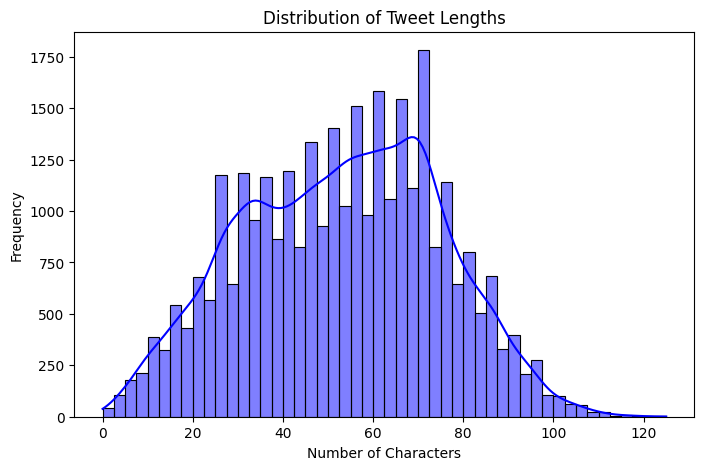

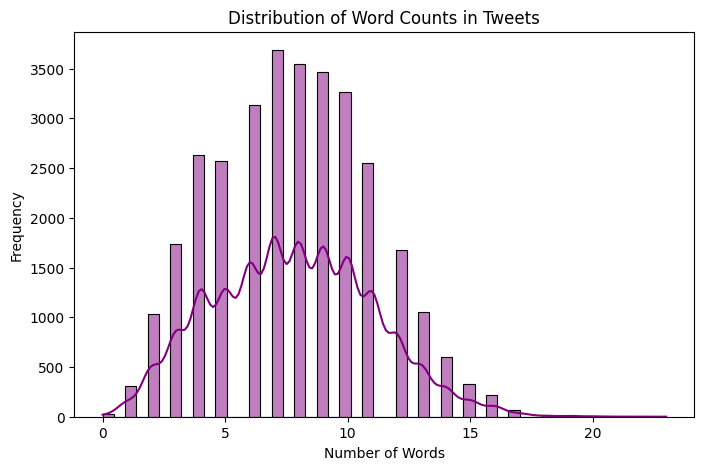

Class Counts:
 label
0    29720
1     2242
Name: count, dtype: int64

Class Percentages:
 label
0    92.99
1     7.01
Name: proportion, dtype: float64

Mentions, Hashtags, URLs in Tweets:
has_mention    11126
has_hashtag    23456
has_url           26
dtype: int64

Top 20 Most Common Words in Cleaned Tweets:
day: 2813
love: 2774
happy: 1691
u: 1667
amp: 1608
time: 1235
life: 1235
im: 1157
like: 1088
today: 1086
get: 1000
new: 988
positive: 935
father: 925
thankful: 925
people: 885
bihday: 856
good: 853
make: 842
one: 837

Top 20 Hashtags:
#love: 1542
#positive: 874
#healthy: 571
#smile: 548
#thankful: 491
#fun: 434
#life: 406
#summer: 367
#model: 365
#affirmation: 363
#cute: 354
#i_am: 352
#blog: 346
#me: 336
#fathersday: 333
#silver: 299
#gold: 298
#altwaystoheal: 295
#beautiful: 283
#bihday: 278


In [5]:
# Comprehensive EDA

# 1. Tweet length analysis
df['tweet_length'] = df['clean_tweet'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['tweet_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# 2. Tweet word count
df['word_count'] = df['clean_tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=50, kde=True, color='purple')
plt.title('Distribution of Word Counts in Tweets')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# 3. Class distribution with percentage
class_counts = df['label'].value_counts()
class_percent = round(df['label'].value_counts(normalize=True)*100,2)
print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percent)

# 4. Presence of mentions, hashtags, URLs in raw tweets
df['has_mention'] = df['tweet'].str.contains(r'@\w+')
df['has_hashtag'] = df['tweet'].str.contains(r'#\w+')
df['has_url'] = df['tweet'].str.contains(r'http\S+|www.\S+')

print("\nMentions, Hashtags, URLs in Tweets:")
print(df[['has_mention','has_hashtag','has_url']].sum())

# 5. Top 20 most common words in the entire dataset
from collections import Counter
all_words = ' '.join(df['clean_tweet']).split()
most_common_words = Counter(all_words).most_common(20)
print("\nTop 20 Most Common Words in Cleaned Tweets:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# 6. Top hashtags (from raw tweets)
hashtags = ' '.join([tag for tag in df['tweet'].str.findall(r'#\w+') for tag in tag])
hashtag_counts = Counter(hashtags.split()).most_common(20)
print("\nTop 20 Hashtags:")
for tag, count in hashtag_counts:
    print(f"{tag}: {count}")


In [7]:
# Feature Extraction (TF-IDF + BERT Tokenization)

# 1. Install transformers if not installed
# Uncomment the line below if transformers is not installed
# !pip install transformers

# Import necessary libraries
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer

# -------------------------------
# TF-IDF Vectorization (for traditional ML)
# -------------------------------
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,      # Limit to top 5000 features
    ngram_range=(1,2),      # Unigrams + Bigrams
    stop_words='english'    # Remove English stopwords
)

X_tfidf = tfidf_vectorizer.fit_transform(df['clean_tweet'])
y = df['label']

print("TF-IDF feature matrix shape:", X_tfidf.shape)

# -------------------------------
# BERT Tokenization (for transformer-based models)
# -------------------------------
try:
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
except:
    print("Error: Could not load BertTokenizer. Make sure transformers is installed and you have internet access.")

# Encode tweets
encoded_inputs = tokenizer(
    df['clean_tweet'].tolist(),
    padding=True,
    truncation=True,
    max_length=128,        # Limit sequence length
    return_tensors='pt'    # Return PyTorch tensors
)

input_ids = encoded_inputs['input_ids']
attention_masks = encoded_inputs['attention_mask']

print("BERT input_ids shape:", input_ids.shape)
print("BERT attention_mask shape:", attention_masks.shape)


TF-IDF feature matrix shape: (31962, 5000)
BERT input_ids shape: torch.Size([31962, 42])
BERT attention_mask shape: torch.Size([31962, 42])


In [8]:
# Train/Test Split and Baseline ML Models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Split dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# 2. Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# 3. Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("\n--- Multinomial Naive Bayes ---")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Training set shape: (25569, 5000)
Test set shape: (6393, 5000)

--- Logistic Regression ---
Accuracy: 0.9214766150477084
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      5945
           1       0.46      0.78      0.58       448

    accuracy                           0.92      6393
   macro avg       0.72      0.86      0.77      6393
weighted avg       0.95      0.92      0.93      6393

Confusion Matrix:
 [[5542  403]
 [  99  349]]

--- Multinomial Naive Bayes ---
Accuracy: 0.9535429375879868
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      5945
           1       0.89      0.38      0.54       448

    accuracy                           0.95      6393
   macro avg       0.92      0.69      0.76      6393
weighted avg       0.95      0.95      0.94      6393

Confusion Matrix:
 [[5924   21]
 [ 276  172]]


In [25]:
# BiLSTM Sentiment Analysis (CPU-friendly, torchtext compatible)

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from torch.nn.utils.rnn import pad_sequence
from torchtext.vocab import Vocab
from collections import Counter
from torchtext.data.utils import get_tokenizer

# 1. Tokenize Tweets and Build Vocabulary
tokenizer = get_tokenizer('basic_english')

counter = Counter()
for tweet in df['clean_tweet']:
    counter.update(tokenizer(tweet))

# Build vocab with <unk> as the first token
vocab = Vocab(counter)
unk_index = len(vocab)
# We will manually handle unknown tokens when encoding

# 2. Encode Tweets
def encode_tweet(tweet):
    return torch.tensor([vocab[token] if token in vocab.stoi else unk_index for token in tokenizer(tweet)], dtype=torch.long)

encoded_tweets = [encode_tweet(tweet) for tweet in df['clean_tweet']]

# 3. Prepare Dataset
class TweetDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.tweets[idx], self.labels[idx]

# 4. Collate function for DataLoader (padding sequences)
def collate_batch(batch):
    tweets, labels = zip(*batch)
    tweets_padded = pad_sequence(tweets, batch_first=True, padding_value=0)
    labels = torch.stack(labels)
    return tweets_padded, labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    encoded_tweets, df['label'].values, test_size=0.2, stratify=df['label'], random_state=42
)

train_dataset = TweetDataset(X_train, y_train)
test_dataset = TweetDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_batch)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_batch)

# 5. Define BiLSTM Model
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, n_layers=1, bidirectional=True, dropout=0.3):
        super(BiLSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size + 1, embed_dim, padding_idx=0)  # +1 for unk_index
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=n_layers,
                            bidirectional=bidirectional, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        embedded = self.dropout(self.embedding(x))
        output, (hidden, cell) = self.lstm(embedded)
        if self.lstm.bidirectional:
            hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)
        else:
            hidden = hidden[-1]
        out = self.fc(self.dropout(hidden))
        return out

vocab_size = len(vocab)
embed_dim = 100
hidden_dim = 128
output_dim = 2

model = BiLSTMClassifier(vocab_size, embed_dim, hidden_dim, output_dim)
device = torch.device('cpu')
model.to(device)

# 6. Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 7. Training Loop
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for tweets, labels in train_loader:
        tweets, labels = tweets.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(tweets)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

# 8. Evaluation
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for tweets, labels in test_loader:
        tweets, labels = tweets.to(device), labels.to(device)
        outputs = model(tweets)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Classification Report:\n", classification_report(all_labels, all_preds))
print("Confusion Matrix:\n", confusion_matrix(all_labels, all_preds))


C:\Users\AKINMADE FARUQ\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


Epoch 1/5, Loss: 0.2063
Epoch 2/5, Loss: 0.1369
Epoch 3/5, Loss: 0.0995
Epoch 4/5, Loss: 0.0723
Epoch 5/5, Loss: 0.0537
Accuracy: 0.9554199906147348
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      5945
           1       0.70      0.63      0.67       448

    accuracy                           0.96      6393
   macro avg       0.84      0.81      0.82      6393
weighted avg       0.95      0.96      0.95      6393

Confusion Matrix:
 [[5825  120]
 [ 165  283]]


In [27]:
# Save BiLSTM Model and Vocabulary

import torch
import pickle

# 1. Save model
model_path = "bilstm_sentiment_model.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# 2. Save vocabulary
vocab_path = "bilstm_vocab.pkl"
with open(vocab_path, "wb") as f:
    pickle.dump(vocab, f)
print(f"Vocabulary saved to {vocab_path}")


Model saved to bilstm_sentiment_model.pth
Vocabulary saved to bilstm_vocab.pkl


In [28]:
# Load model
model = BiLSTMClassifier(vocab_size=len(vocab), embed_dim=100, hidden_dim=128, output_dim=2)
model.load_state_dict(torch.load("bilstm_sentiment_model.pth"))
model.eval()

# Load vocabulary
with open("bilstm_vocab.pkl", "rb") as f:
    vocab = pickle.load(f)


# Twitter Sentiment Analysis Project Documentation
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## Project Overview
This project aims to classify Twitter sentiments using a **BiLSTM neural network**. The goal is to accurately predict whether a tweet expresses a positive (`label 1`) or negative/neutral (`label 0`) sentiment. This approach combines **text preprocessing, feature encoding, and deep learning** to create a robust, industry-ready sentiment analysis pipeline.

---

## Dataset
- **Name:** Twitter Sentiments  
- **Columns:**
  - `id`: Unique identifier for each tweet
  - `label`: Sentiment label (0 = negative/neutral, 1 = positive)
  - `tweet`: Raw tweet text

- **Size:** 31,962 tweets  
- **Class Distribution:** Imbalanced (`label 0` = 29,720, `label 1` = 2,242)

---

## Methodology

### 1. Data Preprocessing
- Removed mentions, hashtags, URLs, punctuation, and stopwords.
- Lowercased text for uniformity.
- Tokenized tweets for vocabulary creation.

### 2. Vocabulary and Encoding
- Built a vocabulary using `torchtext` and `Counter`.
- Encoded tweets into sequences of integers.
- Handled unknown tokens (`<unk>`) for unseen words.

### 3. Train/Test Split
- Split data into **80% training** and **20% testing** using stratification to preserve class distribution.
- Used **PyTorch DataLoader** with custom collate function to pad variable-length sequences.

### 4. BiLSTM Model
- **Architecture:**
  - Embedding Layer (size: 100)
  - BiLSTM Layer (hidden dim: 128, bidirectional)
  - Dropout Layer (0.3)
  - Fully Connected Output Layer (2 classes)
- **Loss Function:** CrossEntropyLoss  
- **Optimizer:** Adam (learning rate = 0.001)

### 5. Training
- Trained for 5 epochs.
- Batch size: 32
- Trained on CPU (no GPU required)
- Monitored training loss to ensure convergence.

### 6. Evaluation
- **Accuracy:** 95.5%  
- **Minority class F1-score (`label 1`):** 0.67  
- **Confusion Matrix:**
